In [ ]:
#Mounting the drive to link with the data
import os
from google.colab import drive
drive.mount('/content/gdrive')
print(os.listdir("/content/gdrive/My Drive/Colab Notebooks/data"))
print(os.listdir("/content/gdrive/My Drive/Colab Notebooks/data/train"))
print(os.listdir("/content/gdrive/My Drive/Colab Notebooks/data/test"))
print(os.listdir("/content/gdrive/My Drive/Colab Notebooks/data/val"))

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
['test', 'train', 'val']
['fresh cotton leaf', 'fresh cotton plant', 'diseased cotton leaf', 'diseased cotton plant']
['fresh cotton plant', 'diseased cotton plant', 'fresh cotton leaf', 'diseased cotton leaf']
['fresh cotton plant', 'diseased cotton leaf', 'diseased cotton plant', 'fresh cotton leaf']


In [ ]:
#!pip install -q keras
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1751: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/gdrive/My Drive/Colab Notebooks/data/train'
valid_path = '/content/gdrive/My Drive/Colab Notebooks/data/test'

In [ ]:
 #Import the ResNet50 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights#

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders = glob('/content/gdrive/My Drive/Colab Notebooks/data/train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/gdrive/My Drive/Colab Notebooks/data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/gdrive/My Drive/Colab Notebooks/data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
61/61 [==============================] - 42s 696ms/step - loss: 3.5301 - accuracy: 0.3890 - val_loss: 1.7762 - val_accuracy: 0.5000
Epoch 2/20
61/61 [==============================] - 38s 624ms/step - loss: 1.0748 - accuracy: 0.5741 - val_loss: 1.4570 - val_accuracy: 0.6111
Epoch 3/20
61/61 [==============================] - 38s 621ms/step - loss: 0.9368 - accuracy: 0.6299 - val_loss: 1.3141 - val_accuracy: 0.5556
Epoch 4/20
61/61 [==============================] - 38s 620ms/step - loss: 1.1080 - accuracy: 0.5828 - val_loss: 1.0718 - val_accuracy: 0.6111
Epoch 5/20
61/61 [==============================] - 38s 623ms/step - loss: 0.9773 - accuracy: 0.6479 - val_loss: 0.9993 - val_accuracy: 0.6111
Epoch 6/20
61/61 [==============================] - 38s 624ms/step - loss: 0.8433 - accuracy: 0.6771 - val_loss: 0.7437 - val_accuracy: 0.7778
Epoch 7/20
61/61 [==============================] - 39s 636ms/step - loss: 0.9080 - accuracy: 0.6658 - val_loss: 0.9945 - val_accuracy: 0.7222

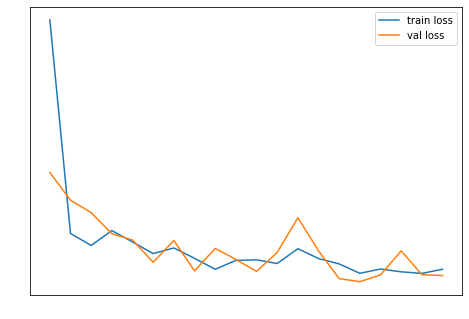

<Figure size 432x288 with 0 Axes>

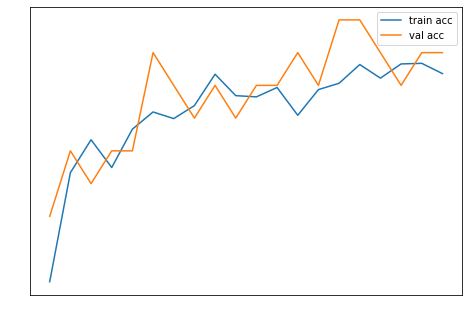

<Figure size 432x288 with 0 Axes>

In [62]:
import matplotlib.pyplot as plt
# plot the loss
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.plot(r.history['loss'], label='train loss',)
plt.plot(r.history['val_loss'], label='val loss')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('/content/gdrive/My Drive/Colab Notebooks/data/model_resnet50.h5')